In [44]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
# from albumentations import augmentations techniques

pandas dataframe id as rows and img and mask as cols

In [22]:
def load_data(path):
    images = sorted(glob(os.path.join(path, "Original\Train\*")))
    masks = sorted(glob(os.path.join(path, "Masks\Train\*")))
    return images, masks

# def augment_data(images, masks, save_path, augment=True):


In [23]:
path = "Img Seg Data"
images, masks = load_data(path)

In [24]:
len(images), len(masks)

(303, 303)

In [52]:
image_directory = 'Img Seg Data/Original/Train'
mask_directory = 'Img Seg Data/Masks/Train'

In [43]:
images = os.listdir(image_directory)

for image_name in images:
    print(image_name)
    print(image_directory+image_name)
    image = cv2.imread(image_directory+image_name, 1)
    break

IMG-20221027-WA0002_jpg.rf.ee8f211bc5de9e5656c2ec0b450e8d03.jpg
Img Seg Data/Original/TrainIMG-20221027-WA0002_jpg.rf.ee8f211bc5de9e5656c2ec0b450e8d03.jpg


In [ ]:
SIZE = 256
image_dataset = []
mask_dataset = []

images = os.listdir(image_directory)
for image_name in images:
    if (image_name.split('.')[3] == 'jpg'):
        image = cv2.imread(image_directory+image_name, 1)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))


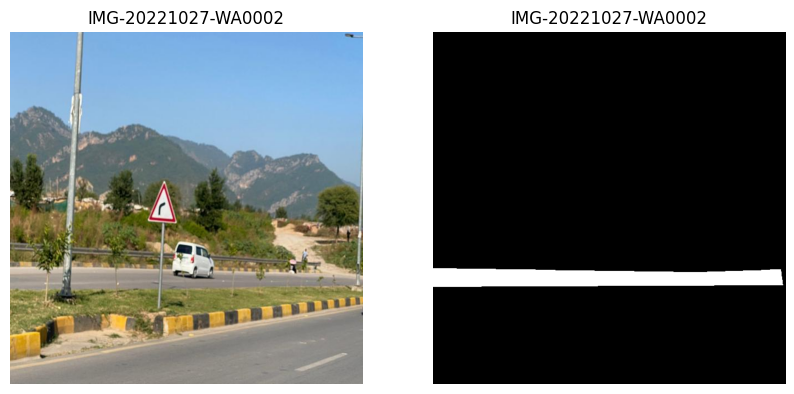

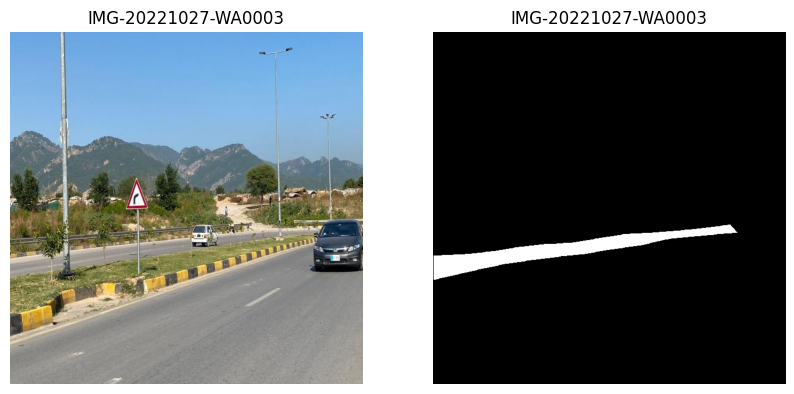

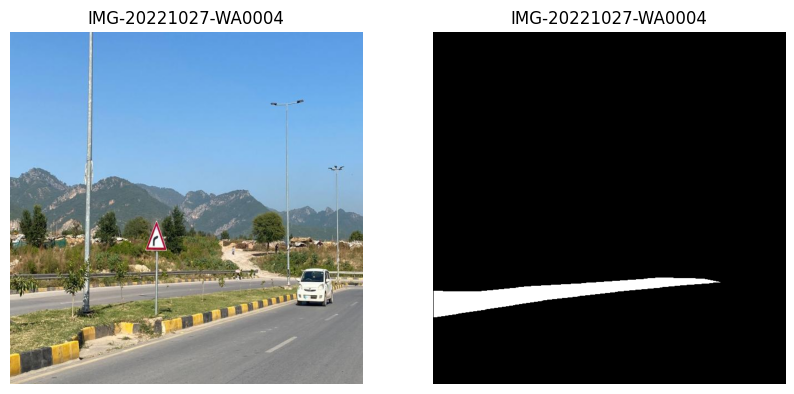

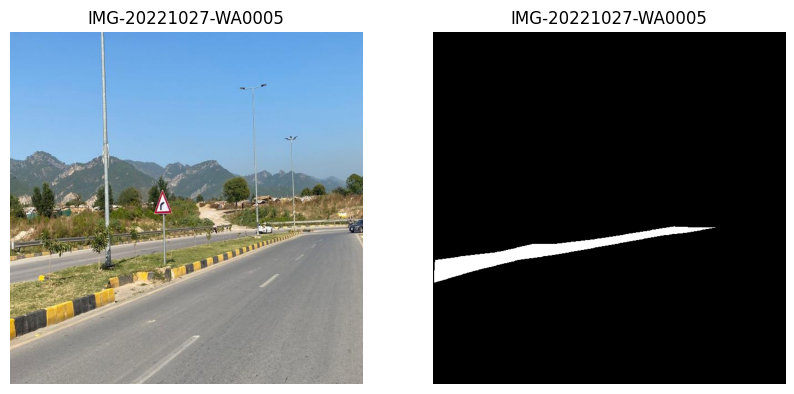

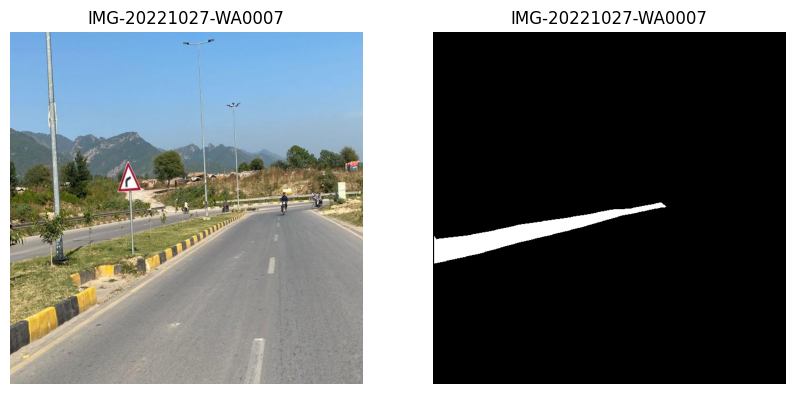

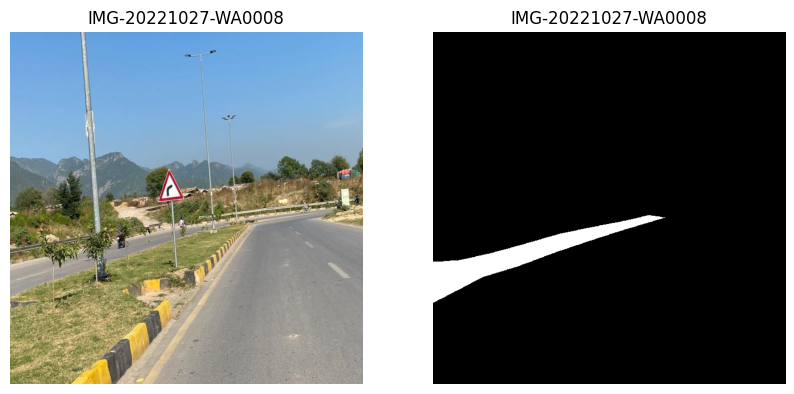

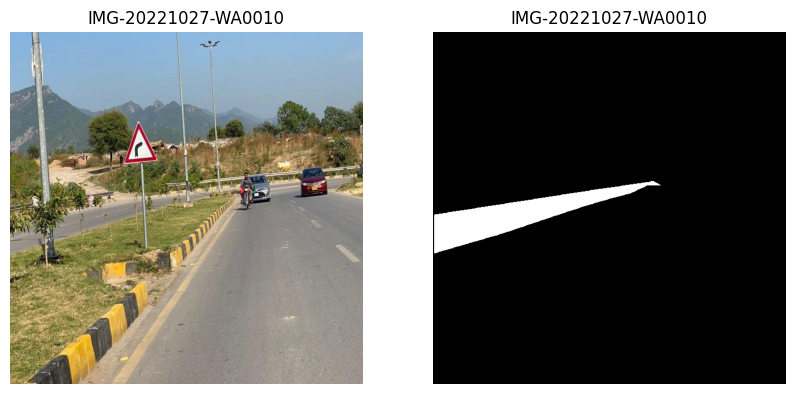

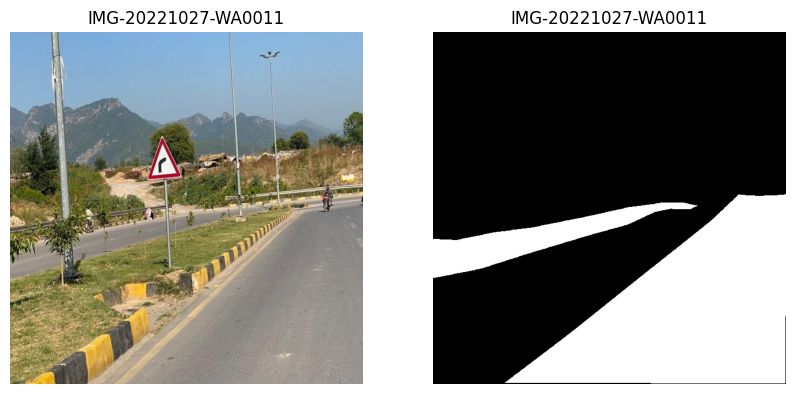

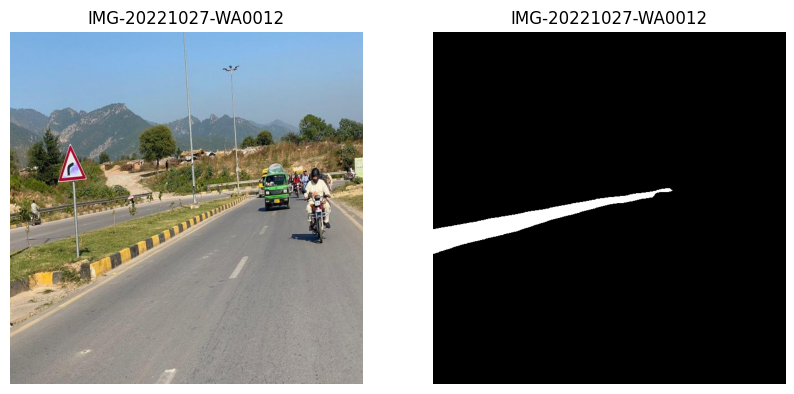

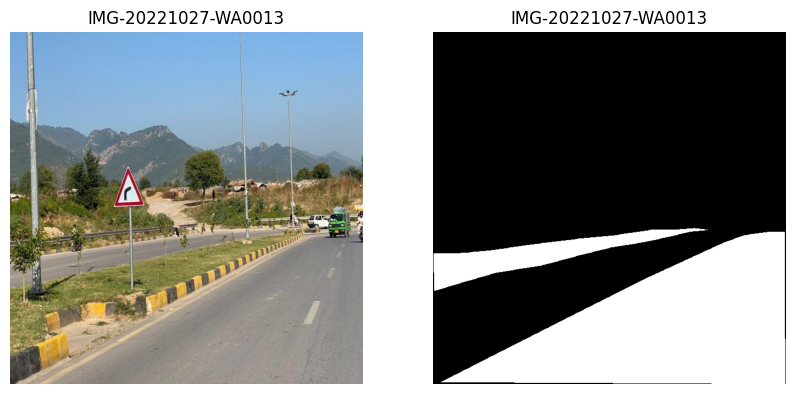

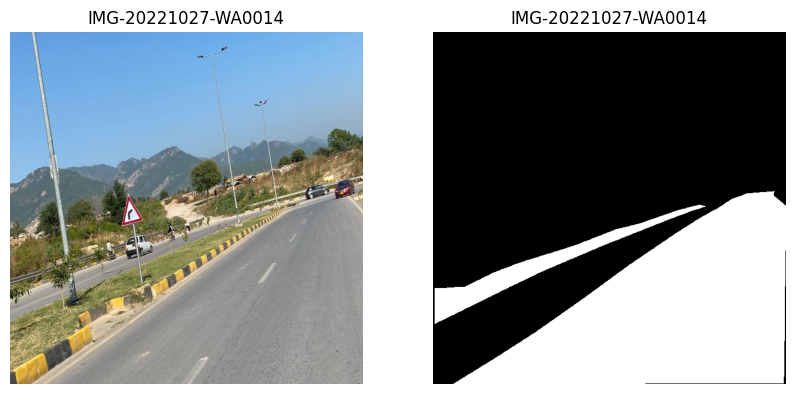

In [73]:
# Get a list of all files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
mask_files = [f for f in os.listdir(mask_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

for i, (image, m) in enumerate(zip(image_files, mask_files)):
    image_path = os.path.join(image_directory, image)
    mask_path = os.path.join(mask_directory, m)

    # Read the image
    img = mpimg.imread(image_path)
    mask = mpimg.imread(mask_path)

    # Convert the image to a NumPy array
    img_array = np.array(img)
    mask_array = np.array(mask)

    # Get the size of the image
    # (height, width, channels)
    img_size = img_array.shape
    mask_size = img_array.shape

    # Plot the image and mask side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.imshow(img)
    ax1.set_title(image[:19])
    ax1.axis('off')

    ax2.imshow(mask, cmap='gray')  # Assuming the mask is a single-channel (grayscale) image
    ax2.set_title(m[:19])
    ax2.axis('off')

    plt.show()
    if i == 10:
        break


In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel (1D tensor)
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
# 	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def get_feature_name(id):
    human_readable_lablels = ["T-shirt/top",  #  0
                        "Trouser",            #  1
                        "Pullover",           #  2   
                        "Dress",              #  3 
                        "Coat",               #  4
                        "Sandal",             #  5
                        "Shirt",              #  6 
                        "Sneaker",            #  7 
                        "Bag",                #  8 
                        "Ankle boot"]         #  9
    return human_readable_lablels[id]

def show_images(ds_x, ds_y, num_row, num_col):  
    fig, axes = pyplot.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

    for i in range(num_row*num_col):
        img_id = randint(len(ds_y))
        ax = axes[i//num_col, i%num_col]
        ax.imshow(ds_x[img_id], cmap='gray_r')
        ylabel = argmax(ds_y[img_id])
        ax.set_title('{}:{}'.format(get_feature_name(ylabel), ylabel))
        ax.set_xticks([])
        ax.set_yticks([])
    pyplot.tight_layout()

# scale pixels
def scale_images(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
